# Project Name - Employee Absenteeism

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from fancyimpute import KNN 
import os
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.gridspec as gridspec 
%matplotlib inline

Using TensorFlow backend.


In [2]:
#set the working directory
os.chdir("C:/Users/Aurangzeb Alam/Desktop/Employee Absenteeism/Edwisor")

In [3]:
#Loading the data
Absent_Employee = pd.read_excel("Absenteeism_at_work_Project.xls")

In [4]:
# First 5 row of dataset Absent_Employee
Absent_Employee.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [5]:
#Shape of the dataframe
Absent_Employee.shape

(740, 21)

In [6]:
# Data Types of all the variables
Absent_Employee.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [7]:
# Number of Unique values present in each variable
Absent_Employee.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

From the problem statement file categorising the variables in two category " Continuous" and "Categorical"

In [8]:
continuous_variable = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense','Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']
continuous_variable

['Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Transportation expense',
 'Hit target',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [9]:
categorical_variable = ['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure', 'Education', 'Social drinker','Social smoker', 'Pet', 'Son']
categorical_variable

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Disciplinary failure',
 'Education',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Son']

In [10]:
#changing the type of categorical value
Absent_Employee['ID']= Absent_Employee['ID'].astype('category')
Absent_Employee['Reason for absence']= Absent_Employee['Reason for absence'].astype('category')
Absent_Employee['Month of absence']= Absent_Employee['Month of absence'].astype('category')
Absent_Employee['Day of the week']= Absent_Employee['Day of the week'].astype('category')
Absent_Employee['Seasons']= Absent_Employee['Seasons'].astype('category')
Absent_Employee['Disciplinary failure']= Absent_Employee['Disciplinary failure'].astype('category')
Absent_Employee['Education']= Absent_Employee['Education'].astype('category')
Absent_Employee['Social drinker']= Absent_Employee['Social drinker'].astype('category')
Absent_Employee['Social smoker']= Absent_Employee['Social smoker'].astype('category')
Absent_Employee['Pet']= Absent_Employee['Pet'].astype('category')
Absent_Employee['Son']= Absent_Employee['Son'].astype('category')

# DATA PRE PROCESSING

# Missing Value Analysis

In [11]:
#Creating dataframe with missing values present in each variable
missing_value = pd.DataFrame(Absent_Employee.isnull().sum()).reset_index()
missing_value

,index,0
0,ID,0
1,Reason for absence,3
2,Month of absence,1
3,Day of the week,0
4,Seasons,0
5,Transportation expense,7
6,Distance from Residence to Work,3
7,Service time,3
8,Age,3
9,Work load Average/day,10


In [12]:
#Renaming variables of missing_val dataframe
missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_value

,Variables,Missing_percentage
0,ID,0
1,Reason for absence,3
2,Month of absence,1
3,Day of the week,0
4,Seasons,0
5,Transportation expense,7
6,Distance from Residence to Work,3
7,Service time,3
8,Age,3
9,Work load Average/day,10


In [13]:
#Calculating percentage missing value
missing_value['Missing_percentage'] = (missing_value['Missing_percentage']/len(Absent_Employee))*100
missing_value

,Variables,Missing_percentage
0,ID,0.000000
1,Reason for absence,0.405405
2,Month of absence,0.135135
3,Day of the week,0.000000
4,Seasons,0.000000
5,Transportation expense,0.945946
6,Distance from Residence to Work,0.405405
7,Service time,0.405405
8,Age,0.405405
9,Work load Average/day,1.351351


In [14]:
# Sorting missing_val in Descending order
missing_value = missing_value.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_value

,Variables,Missing_percentage
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Work load Average/day,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


# Imputation method

In [15]:
Absent_Employee['Body mass index'].iloc[12]

23.0

In [16]:
# Checking for "Body mass index" column
# Actual value = 23
# Mean = 26.68
# Median = 25.0
# KNN = 23

In [17]:
#create missing value
#Absent_Employee['Body mass index'].iloc[12] = np.nan

In [18]:
#Absent_Employee['Body mass index'].iloc[12]

In [19]:
#Impute with mean
#Absent_Employee['Body mass index'] = Absent_Employee['Body mass index'].fillna(Absent_Employee['Body mass index'].mean())
#Absent_Employee['Body mass index'].iloc[12]

In [20]:
#create missing value
#Absent_Employee['Body mass index'].iloc[12] = np.nan

In [21]:
#Absent_Employee['Body mass index'].iloc[12]

In [22]:
# Impute with median
#Absent_Employee['Body mass index'] = Absent_Employee['Body mass index'].fillna(Absent_Employee['Body mass index'].median())
#Absent_Employee['Body mass index'].iloc[12]

In [23]:
#create missing value
Absent_Employee['Body mass index'].iloc[12] = np.nan

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
Absent_Employee['Body mass index'].iloc[12]

nan

In [25]:
#Apply KNN imputation algorithm
Absent_Employee = pd.DataFrame(KNN(k = 5).fit_transform(Absent_Employee), columns = Absent_Employee.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.357
Imputing row 101/740 with 1 missing, elapsed time: 0.365
Imputing row 201/740 with 0 missing, elapsed time: 0.377
Imputing row 301/740 with 0 missing, elapsed time: 0.383
Imputing row 401/740 with 0 missing, elapsed time: 0.387
Imputing row 501/740 with 0 missing, elapsed time: 0.389
Imputing row 601/740 with 0 missing, elapsed time: 0.394
Imputing row 701/740 with 0 missing, elapsed time: 0.397


In [26]:
Absent_Employee['Body mass index'].iloc[12]

23.20431847593071

In [27]:
# as we can see that the KNN value is close to KNN so we have imputed it through KNN
#Checking missing value 
Absent_Employee.isnull().sum().sum()

0

# OUTLIER ANALYSIS

Text(0, 0.5, 'Values')

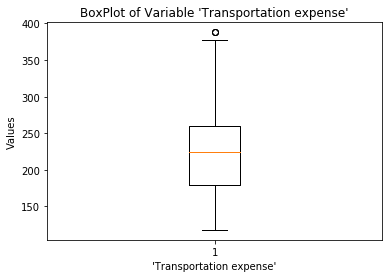

In [28]:
# Ploting BoxPlot of continuous variables
plt.boxplot(Absent_Employee['Transportation expense'])
plt.xlabel("'Transportation expense'")
plt.title("BoxPlot of Variable 'Transportation expense'")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

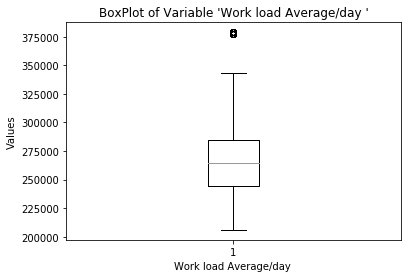

In [29]:
plt.boxplot(Absent_Employee['Work load Average/day '])
plt.xlabel("Work load Average/day ")
plt.title("BoxPlot of Variable 'Work load Average/day '")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

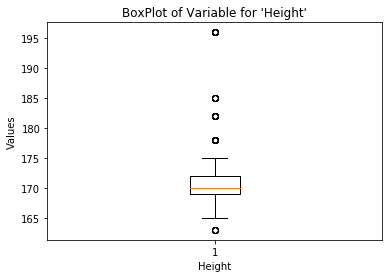

In [30]:
plt.boxplot(Absent_Employee['Height'])
plt.xlabel("Height")
plt.title("BoxPlot of Variable for 'Height'")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

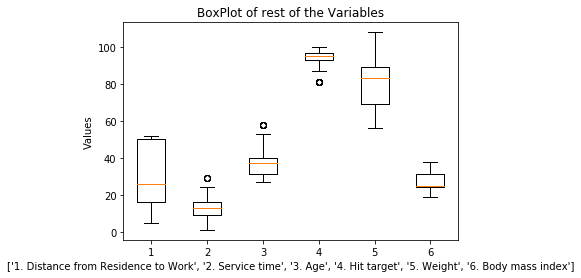

In [31]:
plt.boxplot([ Absent_Employee['Distance from Residence to Work'], Absent_Employee['Service time'], Absent_Employee['Age'], Absent_Employee['Hit target'], Absent_Employee['Weight'], Absent_Employee['Body mass index']])
plt.xlabel(['1. Distance from Residence to Work', '2. Service time', '3. Age', '4. Hit target', '5. Weight', '6. Body mass index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')

In [32]:
# From the above boxplot we can clearly see that in variables 'Distance from Residence to Work', 'Weight' and 'Body mass index'
# there is no outlier

In [33]:
# list of variables which doesn't have outlier
neglect = ['Distance from Residence to Work', 'Weight', 'Body mass index']

# Looping over all continuous variables to detect and remove Outliers
for i in continuous_variable:
    # Avoiding the variables which doesn't have outlier
    if i in neglect:
        continue
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(Absent_Employee[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    print(minimum)
    maximum = q75 + (iqr*1.5)
    print(maximum)
    
    # Replacing all the outliers value to NA
    Absent_Employee.loc[Absent_Employee[i]< minimum,i] = np.nan
    Absent_Employee.loc[Absent_Employee[i]> maximum,i] = np.nan

-1.5
26.5
17.5
53.5
183688.0
345552.0
57.5
381.5
87.0
103.0
164.5
176.5
-7.0
17.0


In [34]:
# Checking if there is any missing value
Absent_Employee.isnull().sum().sum()

231

In [35]:
# Imputing missing values with KNN
Absent_Employee = pd.DataFrame(KNN(k = 5).fit_transform(Absent_Employee), columns = Absent_Employee.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.282
Imputing row 101/740 with 1 missing, elapsed time: 0.285
Imputing row 201/740 with 0 missing, elapsed time: 0.289
Imputing row 301/740 with 0 missing, elapsed time: 0.297
Imputing row 401/740 with 0 missing, elapsed time: 0.300
Imputing row 501/740 with 0 missing, elapsed time: 0.303
Imputing row 601/740 with 0 missing, elapsed time: 0.305
Imputing row 701/740 with 0 missing, elapsed time: 0.308


In [36]:
# Checking if there is any missing value
Absent_Employee.isnull().sum().sum()

0

# FEATURE SELECTION

In [37]:
##Correlation analysis for continuous variables
#Correlation plot
Absent_Employee_corr = Absent_Employee.loc[:,continuous_variable]

[]

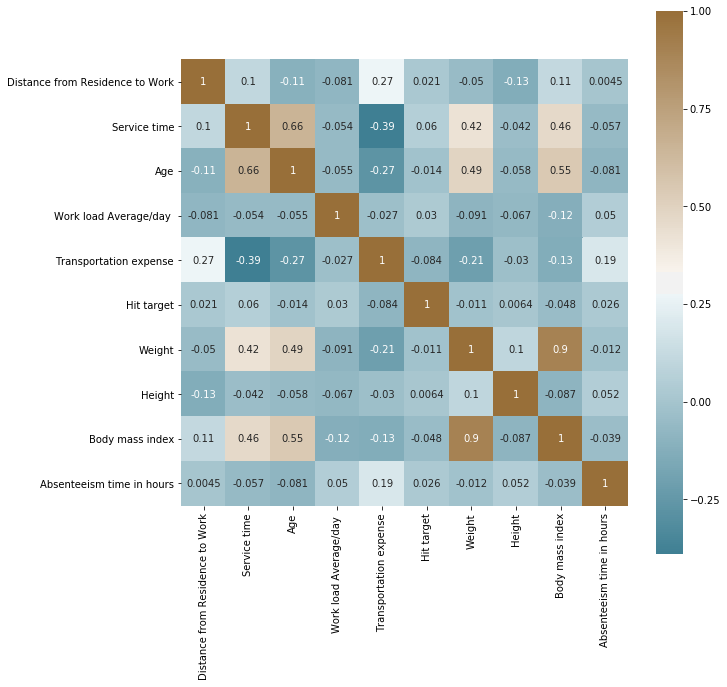

In [38]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = Absent_Employee_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [39]:
# Droping the variables which has redundant information
to_drop = ['Weight']
Absent_Employee = Absent_Employee.drop(to_drop, axis = 1)

In [40]:
# Updating the Continuous Variables and Categorical Variables after droping some variables
continuous_variable = [i for i in continuous_variable if i not in to_drop]
categorical_variable = [i for i in categorical_variable if i not in to_drop]

In [41]:
clean_data = Absent_Employee.copy()

# FEATURE SCALING

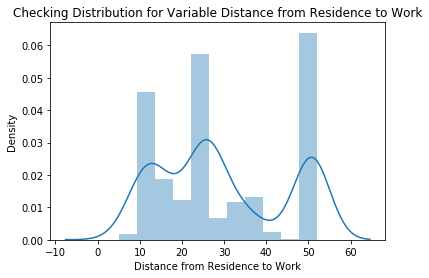

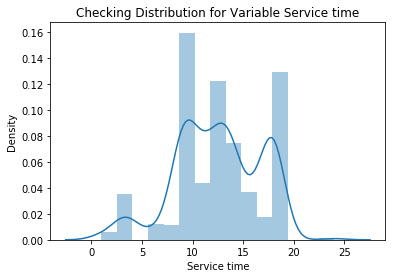

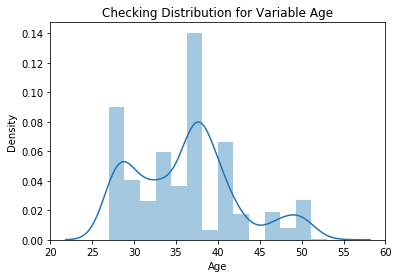

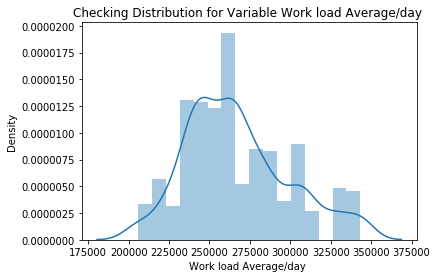

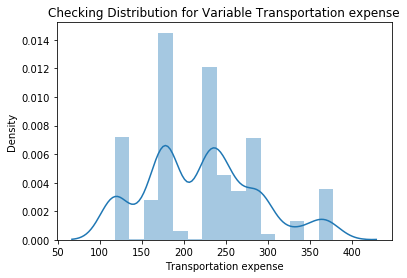

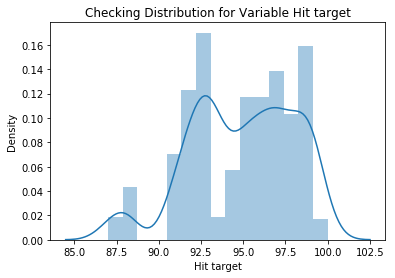

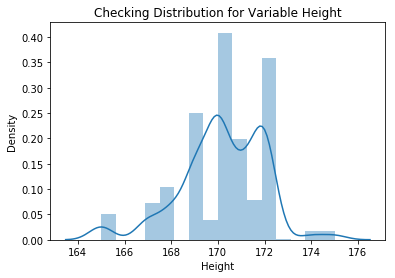

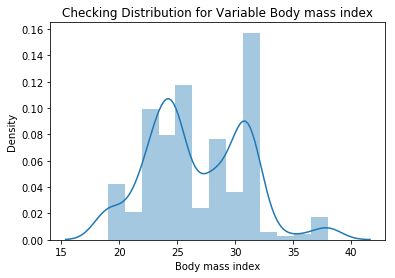

In [42]:
# Checking if there is any normally distributed variable in data
for i in continuous_variable:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(Absent_Employee[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [43]:
# Since there is no normally distributed curve we will use Normalization for Feature Scalling
# #Normalization
for i in continuous_variable:
    if i == 'Absenteeism time in hours':
        continue
    Absent_Employee[i] = (Absent_Employee[i] - Absent_Employee[i].min())/(Absent_Employee[i].max()-Absent_Employee[i].min())

# MACHINE LEARNING MODEL

In [44]:
Absent_Employee1 = Absent_Employee.copy()

In [45]:
# Get dummy variables for categorical variables
Absent_Employee = pd.get_dummies(data = Absent_Employee, columns = categorical_variable)
fields_to_drop = ['Absenteeism time in hours']
Absent_Employee = Absent_Employee.drop(fields_to_drop, axis=1)
Absent_Employee=Absent_Employee.join(Absent_Employee1['Absenteeism time in hours'])

In [46]:
# Copying dataframe
Absent_Employee2 = Absent_Employee.copy()

In [47]:
#Importing some libraries
from sklearn.model_selection import train_test_split
train, test = train_test_split(Absent_Employee, test_size=0.2,random_state=0)

# RANDOM FOREST

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [49]:
Absent_Employee.shape

(740, 139)

In [50]:
# Building model on top of training dataset
RFmodel = RandomForestRegressor(n_estimators = 200).fit(train.iloc[:,0:138], train.iloc[:,138])

In [51]:
RFmodel

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
# Calculating RMSE for training data to check for over fitting
RF_Predictions_tr = RFmodel.predict(train.iloc[:,0:138])
rmse_for_train = np.sqrt(mean_squared_error( train.iloc[:,138],RF_Predictions_tr))
print("RMSE for train:",rmse_for_train)

RMSE for train: 1.107575985353846


In [53]:
# Calculating RMSE for test data to check accuracy
RF_Predictions_ts = RFmodel.predict(test.iloc[:,0:138])
rmse_for_test = np.sqrt(mean_squared_error( test.iloc[:,138],RF_Predictions_ts))
print("RMSE for test:",rmse_for_test)

RMSE for test: 2.7558238490987432


# LINEAR REGRESSION

In [54]:
# Building model on top of training dataset
model = sm.OLS(train.iloc[:,138], train.iloc[:,0:138]).fit()

In [55]:
# Calculating RMSE for training data to check for over fitting
pred_train = model.predict(train.iloc[:,0:138])
rmse_for_train = np.sqrt(mean_squared_error( train.iloc[:,138],pred_train))
print("RMSE for train:",rmse_for_train)

RMSE for train: 2.4050714625644045


In [56]:
# Calculating RMSE for test data to check accuracy
pred_test = model.predict(test.iloc[:,0:138])
rmse_for_test =np.sqrt(mean_squared_error( test.iloc[:,138],pred_test))
print("RMSE for test:",rmse_for_test)

RMSE for test: 3.182751138956921
